# 1. Importing Libraries and Dependencies

In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# 2. Loading and Inspecting the Dataset

In [51]:
# Define the path to your dataset (adjust if necessary)
dataset_path = 'UCI HAR Dataset/' # Assuming you are running from the parent directory of UCI HAR Dataset

# Load training data
X_train = pd.read_csv(f'{dataset_path}train/X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv(f'{dataset_path}train/y_train.txt', delim_whitespace=True, header=None)
subject_train = pd.read_csv(f'{dataset_path}train/subject_train.txt', delim_whitespace=True, header=None)

# Load test data
X_test = pd.read_csv(f'{dataset_path}test/X_test.txt', delim_whitespace=True, header=None)
y_test = pd.read_csv(f'{dataset_path}test/y_test.txt', delim_whitespace=True, header=None)
subject_test = pd.read_csv(f'{dataset_path}test/subject_test.txt', delim_whitespace=True, header=None)

# Load features and activity labels
features = pd.read_csv(f'{dataset_path}features.txt', delim_whitespace=True, header=None)
activity_labels = pd.read_csv(f'{dataset_path}activity_labels.txt', delim_whitespace=True, header=None)

# Let's inspect the shapes of the loaded dataframes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("subject_train shape:", subject_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("subject_test shape:", subject_test.shape)
print("features shape:", features.shape)
print("activity_labels shape:", activity_labels.shape)

/tmp/ipykernel_44002/1679190789.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(f'{dataset_path}train/X_train.txt', delim_whitespace=True, header=None)
/tmp/ipykernel_44002/1679190789.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv(f'{dataset_path}train/y_train.txt', delim_whitespace=True, header=None)
/tmp/ipykernel_44002/1679190789.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  subject_train = pd.read_csv(f'{dataset_path}train/subject_train.txt', delim_whitespace=True, header=None)
/tmp/ipykernel_44002/1679190789.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use `

X_train shape: (7352, 561)
y_train shape: (7352, 1)
subject_train shape: (7352, 1)
X_test shape: (2947, 561)
y_test shape: (2947, 1)
subject_test shape: (2947, 1)
features shape: (561, 2)
activity_labels shape: (6, 2)


/tmp/ipykernel_44002/1679190789.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_test = pd.read_csv(f'{dataset_path}test/y_test.txt', delim_whitespace=True, header=None)
/tmp/ipykernel_44002/1679190789.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  subject_test = pd.read_csv(f'{dataset_path}test/subject_test.txt', delim_whitespace=True, header=None)
/tmp/ipykernel_44002/1679190789.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv(f'{dataset_path}features.txt', delim_whitespace=True, header=None)
/tmp/ipykernel_44002/1679190789.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\

# 3. Data Preprocessing and Exploration

X_train with feature names:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X
0           0.288585          -0.020294          -0.132905         -0.995279
1           0.278419          -0.016411          -0.123520         -0.998245
2           0.279653          -0.019467          -0.113462         -0.995380
3           0.279174          -0.026201          -0.123283         -0.996091
4           0.276629          -0.016570          -0.115362         -0.998139

Missing values in X_train: 0
Missing values in X_test: 0

y_train with activity names:
0    STANDING
1    STANDING
2    STANDING
3    STANDING
4    STANDING
Name: 0, dtype: object


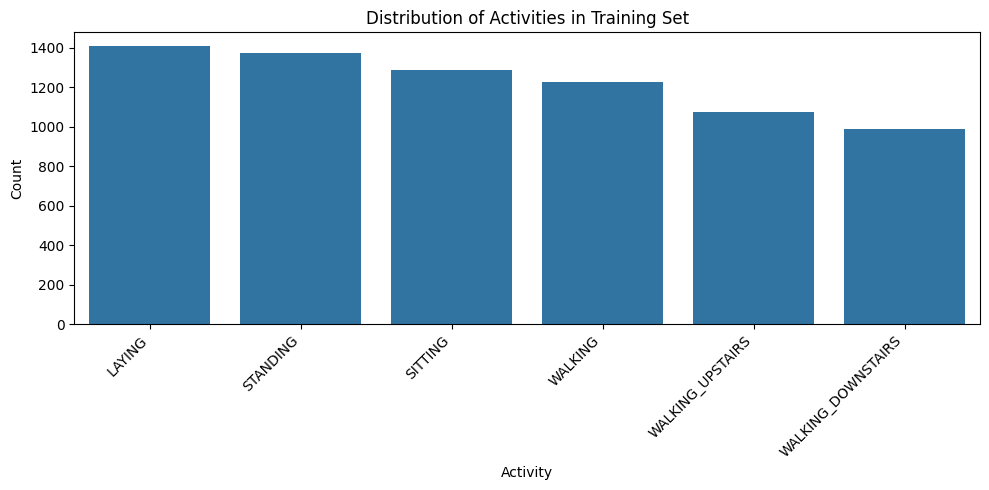


X_train_scaled head (first 5 rows, first 4 columns):
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X
0           0.200642          -0.063683          -0.419628         -0.868814
1           0.055948           0.031486          -0.253908         -0.875426
2           0.073515          -0.043416          -0.076295         -0.869039
3           0.066696          -0.208422          -0.249712         -0.870626
4           0.030469           0.027587          -0.109848         -0.875188


In [52]:
# 1. Assign Feature Names
feature_names = features[1].tolist() # features is a DataFrame with 2 columns, we want the second one
X_train.columns = feature_names
X_test.columns = feature_names

print("X_train with feature names:")
print(X_train.iloc[:, :4].head())
print("\nMissing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in X_test:", X_test.isnull().sum().sum())




# 2. Assign Activity Names
activity_labels_dict = activity_labels.set_index(0)[1].to_dict()
y_train_labels = y_train[0].map(activity_labels_dict)
y_test_labels = y_test[0].map(activity_labels_dict)

print("\ny_train with activity names:")
print(y_train_labels.head())




# 3. Analyze Activity Distribution 
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train_labels, order=y_train_labels.value_counts().index)
plt.title('Distribution of Activities in Training Set')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Data Scaling (Shared task)
scaler = StandardScaler()

# Fit the scaler ONLY on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform both training and test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame if you want to keep column names, optional for most models
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

print("\nX_train_scaled head (first 5 rows, first 4 columns):")
print(X_train_scaled.iloc[:, :4].head())

# 1. One-vs-One SVM Analysis for Activity Separability

This code will perform the exact One-vs-One evaluation methodology needed to replicate the structure of that matrix. We will iterate through all 15 unique pairs of activities, train a dedicated binary SVM for each, and store the accuracy.

In [60]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from itertools import combinations

# Ensure you have your full scaled data and labels ready:
# X_train_scaled, X_test_scaled, y_train_labels, y_test_labels

# It's easier to filter data if we convert the scaled arrays back to DataFrames,
# preserving the original indices which align with the y_labels Series.
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=y_train_labels.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=y_test_labels.index)

print("--- Generating Pairwise Classification Accuracy Matrix (One-vs-One) ---")

# Get the unique activity labels in a consistent, sorted order
activity_labels_ordered = sorted(y_train_labels.unique())

# Initialize an empty DataFrame to store the results
pairwise_accuracy_df = pd.DataFrame(index=activity_labels_ordered, columns=activity_labels_ordered, dtype=float)

# Use itertools.combinations to get all unique pairs of activities
for class1, class2 in combinations(activity_labels_ordered, 2):
    print(f"Training and evaluating for: '{class1}' vs. '{class2}'")
    
    # --- Filter Training Data for the current pair ---
    train_mask = (y_train_labels == class1) | (y_train_labels == class2)
    X_train_pair = X_train_scaled_df[train_mask]
    y_train_pair = y_train_labels[train_mask]
    
    # --- Filter Test Data for the current pair ---
    test_mask = (y_test_labels == class1) | (y_test_labels == class2)
    X_test_pair = X_test_scaled_df[test_mask]
    y_test_pair = y_test_labels[test_mask]
    
    # Skip if there's no test data for this pair (unlikely but good practice)
    if len(y_test_pair) == 0:
        continue
    
    # --- Train a dedicated binary SVM for this pair ---
    svm_pair = SVC(kernel='rbf', random_state=42)
    svm_pair.fit(X_train_pair, y_train_pair)
    
    # --- Predict and calculate accuracy ---
    y_pred_pair = svm_pair.predict(X_test_pair)
    accuracy = accuracy_score(y_test_pair, y_pred_pair)
    
    # --- Store the result in the DataFrame ---
    # We'll store it in the upper triangle, similar to the paper's format
    pairwise_accuracy_df.loc[class1, class2] = accuracy * 100

print("\n--- Pairwise Classification Accuracy Matrix (%) ---")
# Use a custom formatter to display percentages and handle NaNs gracefully
# (The first class in the pair will be the row, the second will be the column)
print(pairwise_accuracy_df.to_string(float_format="%.1f%%"))

--- Generating Pairwise Classification Accuracy Matrix (One-vs-One) ---
Training and evaluating for: 'LAYING' vs. 'SITTING'
Training and evaluating for: 'LAYING' vs. 'STANDING'
Training and evaluating for: 'LAYING' vs. 'WALKING'
Training and evaluating for: 'LAYING' vs. 'WALKING_DOWNSTAIRS'
Training and evaluating for: 'LAYING' vs. 'WALKING_UPSTAIRS'
Training and evaluating for: 'SITTING' vs. 'STANDING'
Training and evaluating for: 'SITTING' vs. 'WALKING'
Training and evaluating for: 'SITTING' vs. 'WALKING_DOWNSTAIRS'
Training and evaluating for: 'SITTING' vs. 'WALKING_UPSTAIRS'
Training and evaluating for: 'STANDING' vs. 'WALKING'
Training and evaluating for: 'STANDING' vs. 'WALKING_DOWNSTAIRS'
Training and evaluating for: 'STANDING' vs. 'WALKING_UPSTAIRS'
Training and evaluating for: 'WALKING' vs. 'WALKING_DOWNSTAIRS'
Training and evaluating for: 'WALKING' vs. 'WALKING_UPSTAIRS'
Training and evaluating for: 'WALKING_DOWNSTAIRS' vs. 'WALKING_UPSTAIRS'

--- Pairwise Classification Accu


Generating heatmap visualization...


/tmp/ipykernel_44002/282726298.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_df = pairwise_accuracy_df.applymap(lambda x: f'{x:.1f}%' if pd.notna(x) else '')


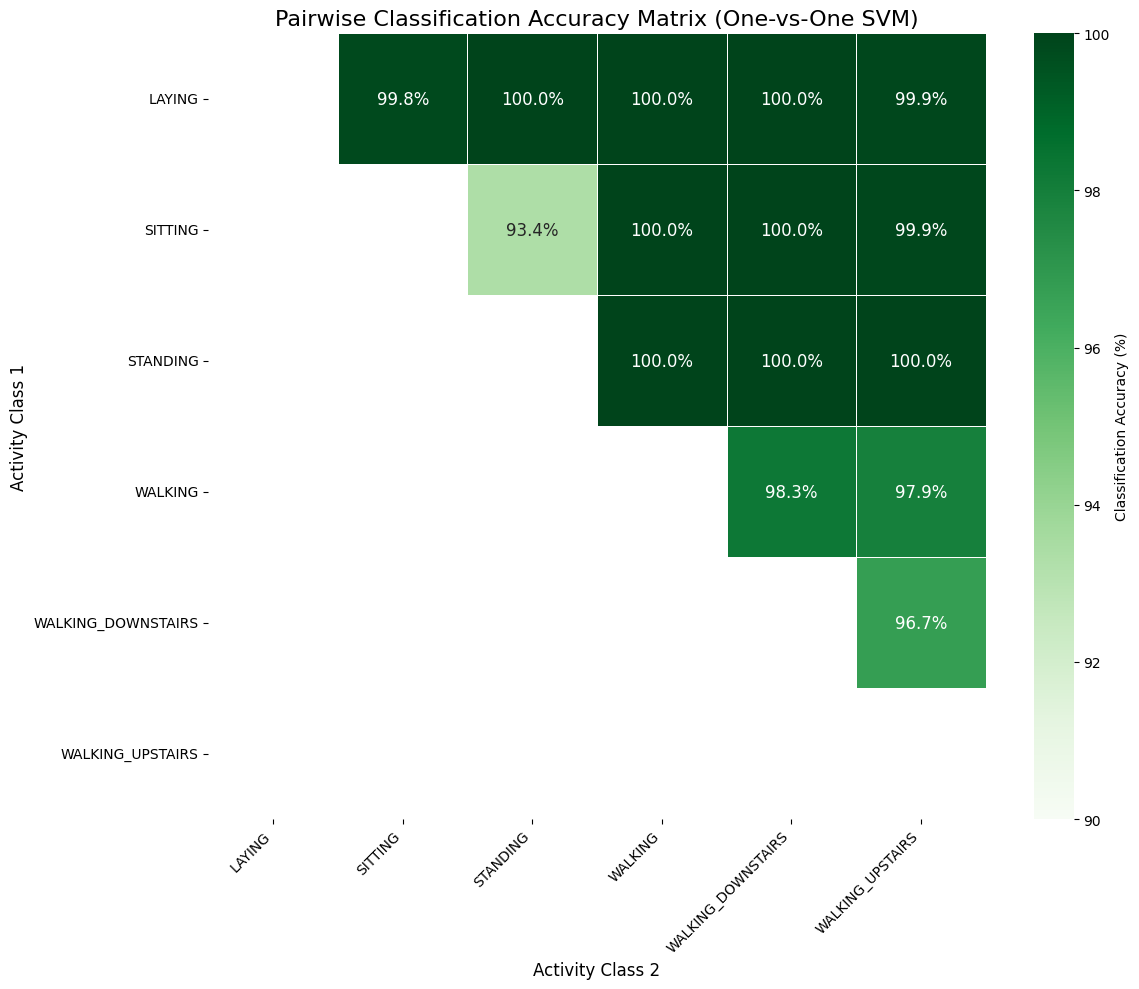

In [ ]:
print("\nGenerating heatmap visualization...")

plt.figure(figsize=(12, 10))

# --- THE FIX ---
# 1. Create a custom annotation DataFrame by formatting the numbers as strings.
#    We will apply a function to each cell. If the cell is not NaN, format it. Otherwise, leave it as is.
annot_df = pairwise_accuracy_df.applymap(lambda x: f'{x:.1f}%' if pd.notna(x) else '')

# 2. Use this new DataFrame for the 'annot' argument and remove the 'fmt' argument.
sns.heatmap(pairwise_accuracy_df, 
            annot=annot_df, # Use our custom string-formatted annotations
            fmt="",          # The fmt argument is now empty because 'annot' is already formatted
            cmap='Greens', 
            linewidths=.5,
            vmin=90,  
            vmax=100,
            cbar_kws={'label': 'Classification Accuracy (%)'},
            annot_kws={"size": 12})

plt.title('Pairwise Classification Accuracy Matrix (One-vs-One SVM)', fontsize=16)
plt.ylabel('Activity Class 1', fontsize=12)
plt.xlabel('Activity Class 2', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. Hierarchical SVM Classification

In [62]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Ensure you have your full scaled data and labels ready:
# X_train_scaled, X_test_scaled, y_train_labels, y_test_labels

# It's easier to work with DataFrames for filtering
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=y_train_labels.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=y_test_labels.index)

print("--- Implementing the Multi-Layer (Hierarchical) SVM ---")

# --- 1. Define Static and Dynamic Activities ---
static_activities = ['SITTING', 'STANDING', 'LAYING']
dynamic_activities = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS']

# ======================= TRAINING PHASE =======================

# --- 2. Train Layer 1: The Static vs. Dynamic Classifier ---
print("Training Layer 1 classifier (Static vs. Dynamic)...")
y_train_layer1 = y_train_labels.apply(lambda x: 'STATIC' if x in static_activities else 'DYNAMIC')

svm_layer1 = SVC(kernel='rbf', random_state=42)
svm_layer1.fit(X_train_scaled_df, y_train_layer1)
print("Layer 1 classifier trained.")

# --- 3. Train Layer 2: The Specialist Classifiers ---

# Train the STATIC specialist
print("Training Layer 2 specialist classifier (for Static activities)...")
X_train_static = X_train_scaled_df[y_train_labels.isin(static_activities)]
y_train_static = y_train_labels[y_train_labels.isin(static_activities)]

svm_static_specialist = SVC(kernel='rbf', random_state=42)
svm_static_specialist.fit(X_train_static, y_train_static)
print("Static specialist trained.")

# Train the DYNAMIC specialist
print("Training Layer 2 specialist classifier (for Dynamic activities)...")
X_train_dynamic = X_train_scaled_df[y_train_labels.isin(dynamic_activities)]
y_train_dynamic = y_train_labels[y_train_labels.isin(dynamic_activities)]

svm_dynamic_specialist = SVC(kernel='rbf', random_state=42)
svm_dynamic_specialist.fit(X_train_dynamic, y_train_dynamic)
print("Dynamic specialist trained.")

# ======================= PREDICTION PHASE =======================
print("\nMaking predictions on the test set using the hierarchical model...")

# Step 1: Get Layer 1 predictions for the entire test set
layer1_predictions = svm_layer1.predict(X_test_scaled_df)

# Step 2: Apply the specialist models based on Layer 1's output
final_predictions = []
for i in range(len(X_test_scaled_df)):
    # Get the i-th test sample and its Layer 1 prediction
    test_sample = X_test_scaled_df.iloc[i:i+1] # Keep it as a DataFrame
    layer1_pred = layer1_predictions[i]
    
    if layer1_pred == 'STATIC':
        # Use the static specialist for the final prediction
        final_pred = svm_static_specialist.predict(test_sample)[0]
    else: # layer1_pred == 'DYNAMIC'
        # Use the dynamic specialist for the final prediction
        final_pred = svm_dynamic_specialist.predict(test_sample)[0]
        
    final_predictions.append(final_pred)

print("Prediction complete.")

# ======================= EVALUATION PHASE =======================
print("\n--- Multi-Layer SVM Performance ---")
print(f"Accuracy: {accuracy_score(y_test_labels, final_predictions):.4f}")
print("Classification Report:\n", classification_report(y_test_labels, final_predictions))

--- Implementing the Multi-Layer (Hierarchical) SVM ---
Training Layer 1 classifier (Static vs. Dynamic)...
Layer 1 classifier trained.
Training Layer 2 specialist classifier (for Static activities)...
Static specialist trained.
Training Layer 2 specialist classifier (for Dynamic activities)...
Dynamic specialist trained.

Making predictions on the test set using the hierarchical model...
Prediction complete.

--- Multi-Layer SVM Performance ---
Accuracy: 0.9522
Classification Report:
                     precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       537
           SITTING       0.95      0.90      0.92       491
          STANDING       0.92      0.95      0.94       532
           WALKING       0.95      0.97      0.96       496
WALKING_DOWNSTAIRS       0.98      0.91      0.94       420
  WALKING_UPSTAIRS       0.93      0.97      0.95       471

          accuracy                           0.95      2947
         macro avg       0.

# 3. Voting Classifier (LR, DT, kNN, RF, SVM)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Ensure you have your full scaled data and labels ready:
# X_train_scaled, X_test_scaled, y_train_labels, y_test_labels

print("--- Implementing the 'Voting' Ensemble Classifier ---")

# --- 1. Initialize the 5 Base Classifiers ---
# We use reasonable default parameters and a random_state for reproducibility

clf1 = LogisticRegression(max_iter=1000, random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = KNeighborsClassifier() # n_neighbors=5 is the default
clf4 = RandomForestClassifier(n_estimators=100, random_state=42)
clf5 = SVC(kernel='rbf', random_state=42)

# --- 2. Create the Ensemble using VotingClassifier ---
# We create a list of tuples, with a name for each classifier and the classifier object itself.
# 'voting="hard"' means the final prediction is based on a majority vote of the predicted labels.
# This is exactly what the paper describes.
ensemble_clf = VotingClassifier(
    estimators=[
        ('lr', clf1), #Logistic regression
        ('dt', clf2), #Decision tree
        ('knn', clf3), #K Nearest Neighbors
        ('rf', clf4), #Random Forest
        ('svc', clf5) #Support Vector Classifier
    ],
    voting='hard' # Use 'hard' for majority voting
)

# --- 3. Train the Ensemble Classifier ---
# When you call .fit() on the VotingClassifier, it trains all 5 base models.
print("Training the ensemble of 5 models...")
ensemble_clf.fit(X_train_scaled, y_train_labels)
print("Training complete.")

# --- 4. Make Predictions and Evaluate ---
print("\nMaking predictions using the ensemble...")
y_pred_ensemble = ensemble_clf.predict(X_test_scaled)
print("Prediction complete.")

print("\n--- Voting Ensemble Performance ---")
print(f"Accuracy: {accuracy_score(y_test_labels, y_pred_ensemble):.4f}")
print("Classification Report:\n", classification_report(y_test_labels, y_pred_ensemble))

--- Implementing the 'Voting' Ensemble Classifier ---
Training the ensemble of 5 models...
Training complete.

Making predictions using the ensemble...
Prediction complete.

--- Voting Ensemble Performance ---
Accuracy: 0.9532
Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.95      0.89      0.92       491
          STANDING       0.91      0.95      0.93       532
           WALKING       0.94      0.99      0.97       496
WALKING_DOWNSTAIRS       0.98      0.92      0.95       420
  WALKING_UPSTAIRS       0.94      0.95      0.95       471

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



# 4. K-Means as a Classifier

--- Implementing K-Means as a Classifier (Nearest Centroid) ---
Training K-Means on the training data to find 6 centroids...
Centroids found.
Assigning majority activity labels to each centroid...
Centroid labels assigned:
  - Centroid for Cluster 0 is labeled as: 'STANDING'
  - Centroid for Cluster 1 is labeled as: 'WALKING_UPSTAIRS'
  - Centroid for Cluster 2 is labeled as: 'WALKING_DOWNSTAIRS'
  - Centroid for Cluster 3 is labeled as: 'LAYING'
  - Centroid for Cluster 4 is labeled as: 'WALKING_DOWNSTAIRS'
  - Centroid for Cluster 5 is labeled as: 'STANDING'

Predicting test set labels by finding the nearest centroid...
Prediction complete.

--- K-Means as a Classifier Performance ---
Accuracy: 0.5721
Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      0.82      0.90       537
           SITTING       0.00      0.00      0.00       491
          STANDING       0.48      1.00      0.64       532
           WALKING    

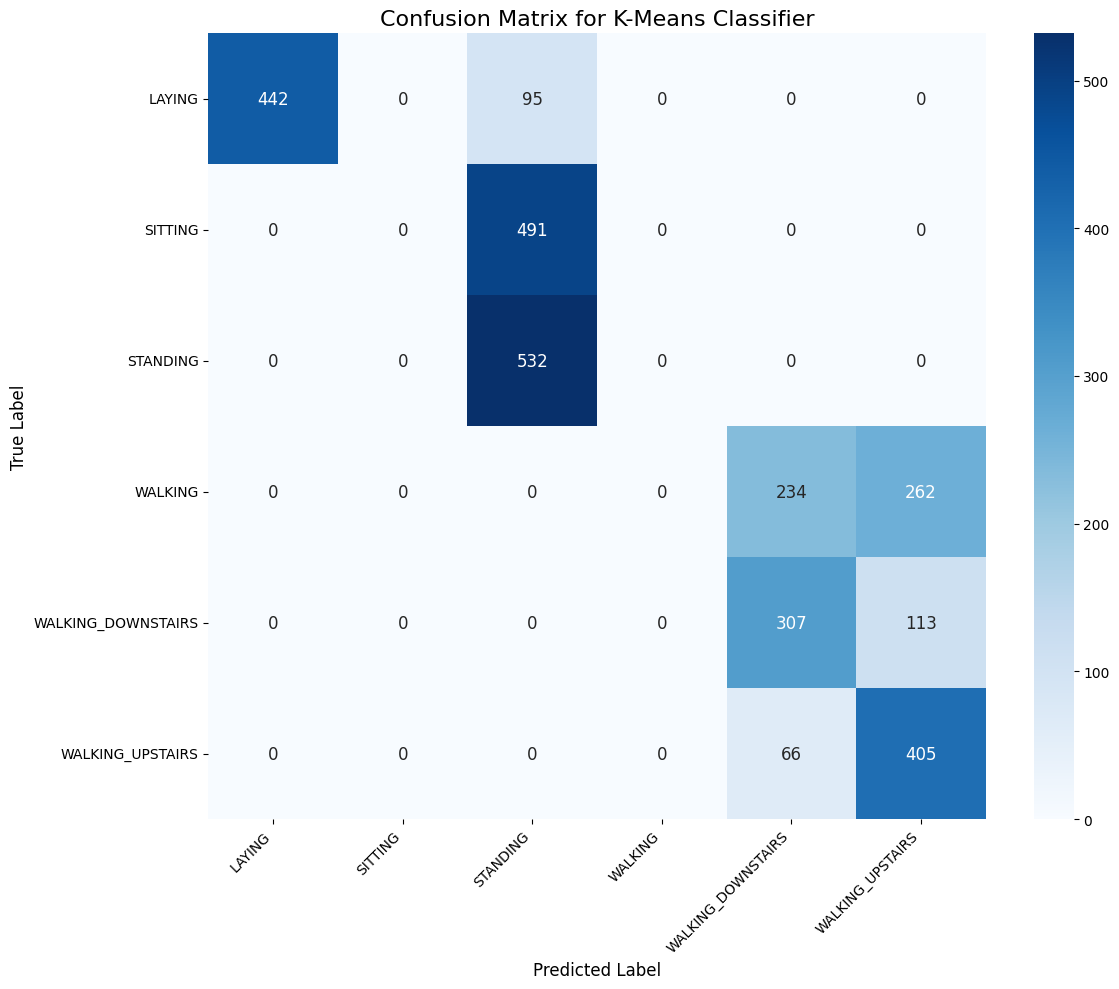

In [68]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report
# We no longer need scipy.stats.mode, so you can remove that import if you have it

# Ensure you have your full scaled data and labels ready:
# X_train_scaled, X_test_scaled, y_train_labels, y_test_labels

print("--- Implementing K-Means as a Classifier (Nearest Centroid) ---")

# --- 1. Train K-Means to Find the Centroids ---
print("Training K-Means on the training data to find 6 centroids...")
kmeans = KMeans(n_clusters=6, random_state=42, n_init='auto')
kmeans.fit(X_train_scaled)
print("Centroids found.")

# --- 2. Label Each Centroid with the Majority Activity ---
print("Assigning majority activity labels to each centroid...")
centroid_labels = {}
for i in range(6): 
    cluster_mask = (kmeans.labels_ == i)
    true_labels_in_cluster = y_train_labels[cluster_mask]
    
    # === THE FIX IS HERE ===
    # Find the most common (mode) label using pandas' built-in .mode() method
    dominant_label = true_labels_in_cluster.mode()[0]
    
    centroid_labels[i] = dominant_label

print("Centroid labels assigned:")
for i in range(6):
    print(f"  - Centroid for Cluster {i} is labeled as: '{centroid_labels[i]}'")

# --- 3. Predict on the Test Set ---
print("\nPredicting test set labels by finding the nearest centroid...")
predicted_cluster_indices = kmeans.predict(X_test_scaled)
final_predictions = [centroid_labels[i] for i in predicted_cluster_indices]
print("Prediction complete.")


# --- 4. Evaluate the Performance ---
print("\n--- K-Means as a Classifier Performance ---")
print(f"Accuracy: {accuracy_score(y_test_labels, final_predictions):.4f}")
print("Classification Report:\n", classification_report(y_test_labels, final_predictions, zero_division=0))

print("\nGenerating confusion matrix heatmap...")

# Get the list of class labels in a sorted order for consistency
class_labels = sorted(y_test_labels.unique())

# Generate the confusion matrix
cm = confusion_matrix(y_test_labels, final_predictions, labels=class_labels)

# For better visualization, let's put it in a pandas DataFrame
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cm_df, 
            annot=True,     # Show the numbers in the cells
            fmt='d',        # Format as integers
            cmap='Blues',   # Use a blue color scheme
            annot_kws={"size": 12})

plt.title('Confusion Matrix for K-Means Classifier', fontsize=16)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()